In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

In [3]:
# bez resamplovanja
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

In [4]:
# naivni Bajes bez resamplovanja
# daje loše rezultate
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [5]:
print('Performanse naivnog Bajesa bez resamplovanja:\n')
print(confusion_matrix(y_test, y_pred_nb))
print('\n')
print(classification_report(y_test, y_pred_nb))
print('\n')
print('Accuracy:', round(accuracy_score(y_test, y_pred_nb), 5))
print('Precision:', round(precision_score(y_test, y_pred_nb, average='weighted'), 5))
print('Recall:', round(recall_score(y_test, y_pred_nb, average='weighted'), 5))
print('F1 Score:', round(f1_score(y_test, y_pred_nb, average='weighted'), 5))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_nb))

Performanse naivnog Bajesa bez resamplovanja:

[[288007   1789   2534   7601   2331   1273]
 [ 76230    759   1291   4935   1205    535]
 [ 45643    553   1053   4615   1331    555]
 [ 28107    503    936   4057   1171    736]
 [ 14023    260    675   2710    671    666]
 [  5483     93    199    610    233    738]]


              precision    recall  f1-score   support

           0       0.63      0.95      0.76    303535
           1       0.19      0.01      0.02     84955
           2       0.16      0.02      0.03     53750
           3       0.17      0.11      0.14     35510
           4       0.10      0.04      0.05     19005
           5       0.16      0.10      0.12      7356

    accuracy                           0.59    504111
   macro avg       0.23      0.20      0.19    504111
weighted avg       0.45      0.59      0.48    504111



Accuracy: 0.58575
Precision: 0.44585
Recall: 0.58575
F1 Score: 0.47562
Cohen Kappa Score: 0.07275176670196981


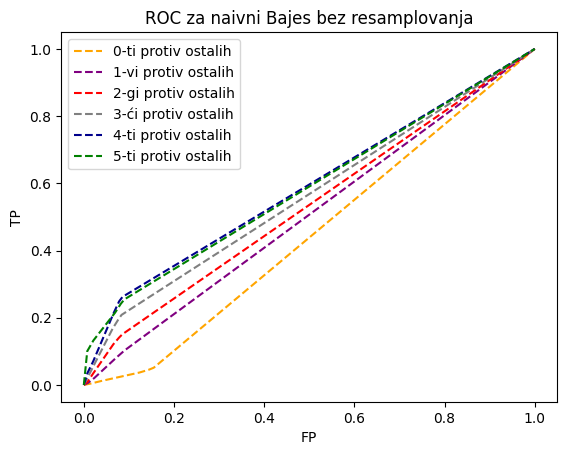

In [6]:
# vizuelizacija
# vidimo da stvarno daje loše rezultate
fp_rate = dict()
tp_rate = dict()

for i in range(6):    
    fp_rate[i], tp_rate[i], _ = roc_curve(y_test, y_pred_nb, pos_label=i)

plt.plot(fp_rate[0], tp_rate[0], linestyle='--',color='orange', label='0-ti protiv ostalih')
plt.plot(fp_rate[1], tp_rate[1], linestyle='--',color='purple', label='1-vi protiv ostalih')
plt.plot(fp_rate[2], tp_rate[2], linestyle='--',color='red', label='2-gi protiv ostalih')
plt.plot(fp_rate[3], tp_rate[3], linestyle='--',color='gray', label='3-ći protiv ostalih')
plt.plot(fp_rate[4], tp_rate[4], linestyle='--',color='darkblue', label='4-ti protiv ostalih')
plt.plot(fp_rate[5], tp_rate[5], linestyle='--',color='green', label='5-ti protiv ostalih')

plt.title('ROC za naivni Bajes bez resamplovanja')
plt.xlabel('FP')
plt.ylabel('TP')
plt.legend(loc='best')

In [7]:
%store y_pred_nb

Stored 'y_pred_nb' (ndarray)
